In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Загрузка данных из CSV файла
file_path = 'data2.csv'  # Замените на путь к вашему файлу
df = pd.read_csv(file_path)

# Первичный анализ данных
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2209 non-null   object 
 1   Company        2209 non-null   object 
 2   Ticker Symbol  2209 non-null   object 
 3   Currency       2209 non-null   object 
 4   Open           2209 non-null   float64
 5   High           2209 non-null   float64
 6   Low            2209 non-null   float64
 7   Close          2209 non-null   float64
 8   Adj Close      2209 non-null   float64
 9   Volume         2209 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 172.7+ KB
None
         Date                         Company Ticker Symbol Currency  \
0  2000-01-01  Sony Interactive Entertainment          SONY      JPY   
1  2000-02-01  Sony Interactive Entertainment          SONY      JPY   
2  2000-03-01  Sony Interactive Entertainment          SONY      JPY   
3  2000-

In [ ]:
# Преобразование timestamp в datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Проверка на пропущенные значения
missing_values = df.isnull().sum()
print("Пропущенные значения:\n", missing_values)

label_encoder = LabelEncoder()

# Преобразуем каждое из указанных полей
categorical_columns = ['Company', 'Ticker Symbol', 'Currency']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    print(f"Уникальные значения в {column} после кодирования:", df[column].unique())

Пропущенные значения:
 Date             0
Company          0
Ticker Symbol    0
Currency         0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64
Уникальные значения в Company после кодирования: [7 9 2 4 3 0 8 1 6 5]
Уникальные значения в Ticker Symbol после кодирования: [8 0 3 4 5 1 9 2 7 6]
Уникальные значения в Currency после кодирования: [1 0 3 2]


In [ ]:
company_id = 0
data = df[df['Company'] == company_id]
data['Date']

,Date
1430,2000-01-01
1431,2000-02-01
1432,2000-03-01
1433,2000-04-01
1434,2000-05-01
...,...
1723,2024-06-01
1724,2024-07-01
1725,2024-08-01
1726,2024-09-01


In [ ]:
# scaler = MinMaxScaler()
# numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
# data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [ ]:
# Проверка результата
print(data.head())
print(data.info())

           Date  Company  Ticker Symbol  Currency      Open       High  \
1430 2000-01-01        0              1         3  21.25000  28.765625   
1431 2000-02-01        0              1         3  20.46875  25.562500   
1432 2000-03-01        0              1         3  23.75000  26.125000   
1433 2000-04-01        0              1         3  18.00000  18.031250   
1434 2000-05-01        0              1         3  15.00000  16.968750   

            Low      Close  Adj Close     Volume  
1430  16.968750  20.437500  19.989416  140837600  
1431  18.750000  25.000000  24.451891   70948000  
1432  17.062500  17.796875  17.406679  138755600  
1433  12.671875  15.125000  14.793389  115839200  
1434  12.250000  15.968750  15.618642  135958000  
<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 1430 to 1727
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           298 non-null    datetim

Проверка для Open
ADF Statistic: -0.6387889855301282
p-value: 0.8619742602250886
Данные не стационарны
--------------------------------------------------
Проверка для High
ADF Statistic: -0.35514827193225057
p-value: 0.9173223849378926
Данные не стационарны
--------------------------------------------------
Проверка для Low
ADF Statistic: -0.09400424857273161
p-value: 0.9500324685861062
Данные не стационарны
--------------------------------------------------
Проверка для Close
ADF Statistic: -0.2730656799090944
p-value: 0.9292333593354137
Данные не стационарны
--------------------------------------------------
Проверка для Adj Close
ADF Statistic: -0.20166244531531716
p-value: 0.938323168052756
Данные не стационарны
--------------------------------------------------
Проверка для Volume
ADF Statistic: -1.8586667437429876
p-value: 0.35174825434934787
Данные не стационарны
--------------------------------------------------


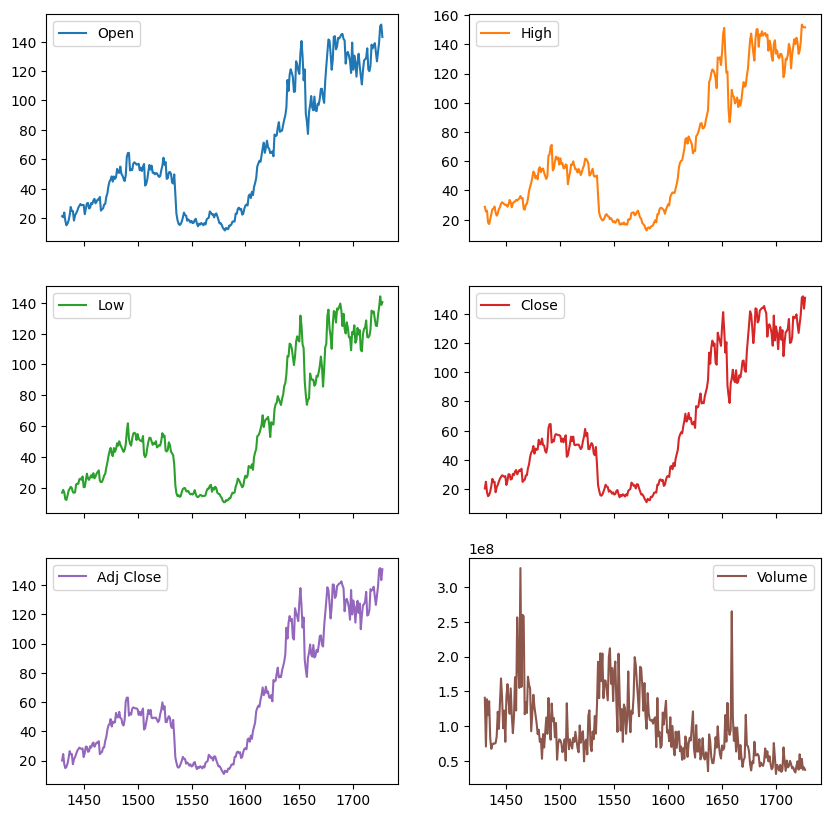

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Функция для теста на стационарность
def test_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print('Данные стационарны')
        return True
    else:
        print('Данные не стационарны')
        return False

# Проверка для каждого из столбцов
columns_to_check = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
for column in columns_to_check:
    print(f'Проверка для {column}')
    test_stationarity(data[column])
    print('-' * 50)

# Для визуализации тренда и сезонности
data[columns_to_check].plot(subplots=True, layout=(3,2), figsize=(10,10))
plt.show()


In [ ]:
# data['Open'] = data['Open'] - data['Open'].shift(12)
# data['High'] = data['High'] - data['High'].shift(12)
# data['Low'] = data['Low'] - data['Low'].shift(12)
# data['Close'] = data['Close'] - data['Close'].shift(12)
# data['Adj Close'] = data['Adj Close'] - data['Adj Close'].shift(12)
# data['Volume'] = data['Volume'] - data['Volume'].shift(12)
# data = data.fillna(data.median())  # Заменяет NaN на медиану
# # Замена Inf на максимальные/минимальные значения

# columns_to_check = ["Volume"]

# # Результаты тестов
# stationarity_results = {}
# for col in columns_to_check:
#     result = check_stationarity(data[col])
#     stationarity_results[col] = result
#     # Вывод результата
#     print(result)
#     status = "Стационарен" if result["Is_Stationary"] else "Нестационарен"
#     print(f"Ряд '{col}': {status} (ADF p-value: {result['ADF_P-Value']:.4f}, KPSS p-value: {result['KPSS_P-Value']:.4f})")
# print(data['Volume'])

In [ ]:
# data = data.set_index('Date')


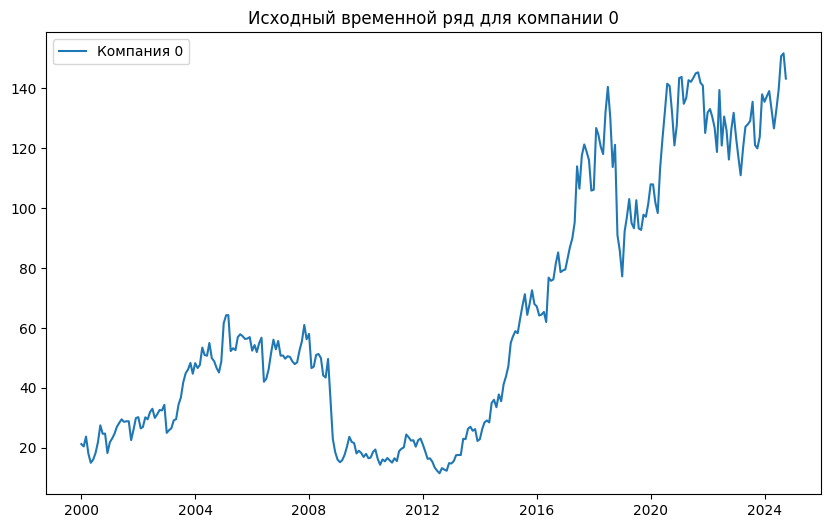

In [ ]:
# 2a
time_series = data.set_index('Date')['Open']

plt.figure(figsize=(10, 6))
plt.plot(time_series, label=f'Компания {company_id}')
plt.title(f'Исходный временной ряд для компании {company_id}')
plt.legend()
plt.show()

In [ ]:
# 2. Проверка стационарности с помощью теста ADF
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] > 0.05:
        print("Временной ряд нестационарен.")
    else:
        print("Временной ряд стационарен.")


Результаты теста ADF для дифференцированного ряда:
ADF Statistic: -5.591090243793306
p-value: 1.3286113612669637e-06
Critical Values:
   1%: -3.4531816058796143
   5%: -2.871593390724642
   10%: -2.5721268156511536
Временной ряд стационарен.


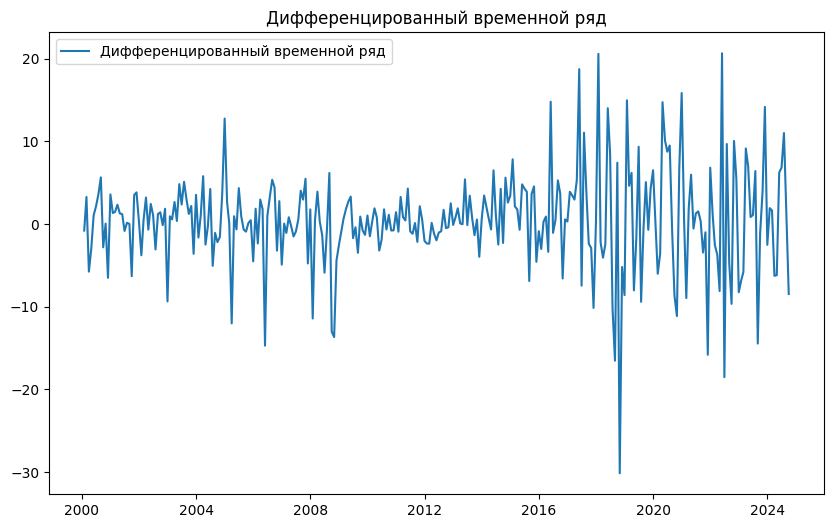

In [ ]:
time_series_diff = time_series.diff().dropna()

# Проверим стационарность преобразованного ряда
print("\nРезультаты теста ADF для дифференцированного ряда:")
adf_test(time_series_diff)

# Построим график преобразованного временного ряда
plt.figure(figsize=(10, 6))
plt.plot(time_series_diff, label='Дифференцированный временной ряд')
plt.title('Дифференцированный временной ряд')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


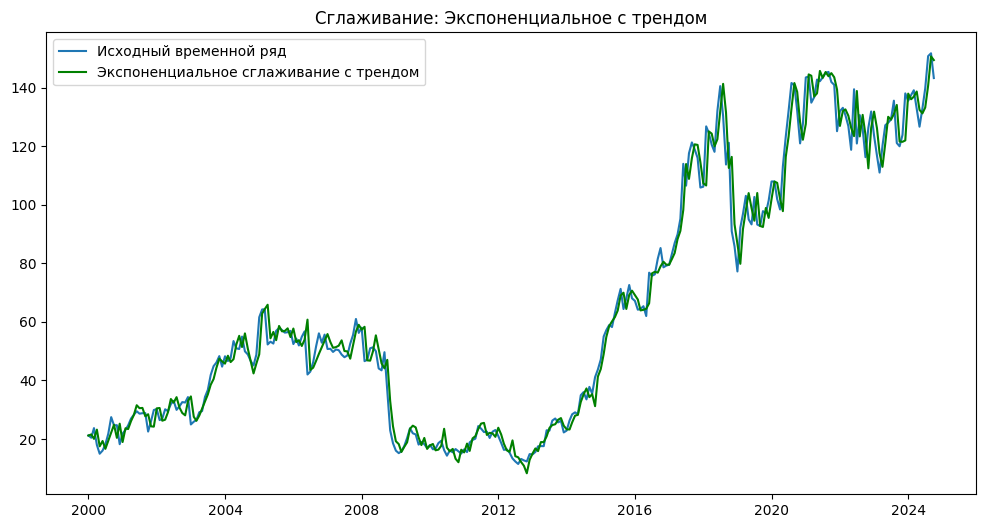

In [ ]:
#2b
model = ExponentialSmoothing(
    time_series,
    trend='add',
    seasonal='add',
    seasonal_periods=24
).fit()
exp_smoothing_trend = model.fittedvalues

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Исходный временной ряд')
plt.plot(exp_smoothing_trend, label='Экспоненциальное сглаживание с трендом', color='green')
plt.title('Сглаживание: Экспоненциальное с трендом')
plt.legend()
plt.show()

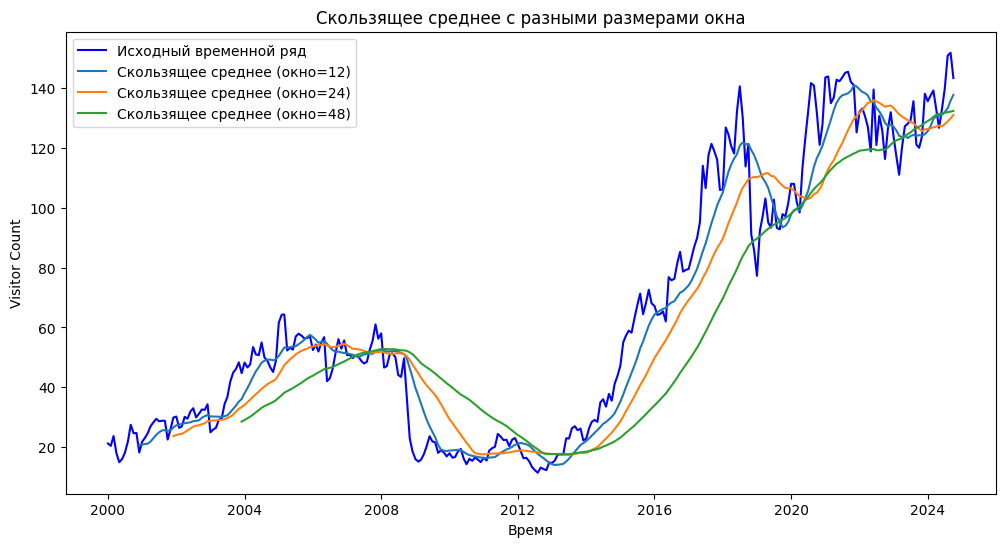

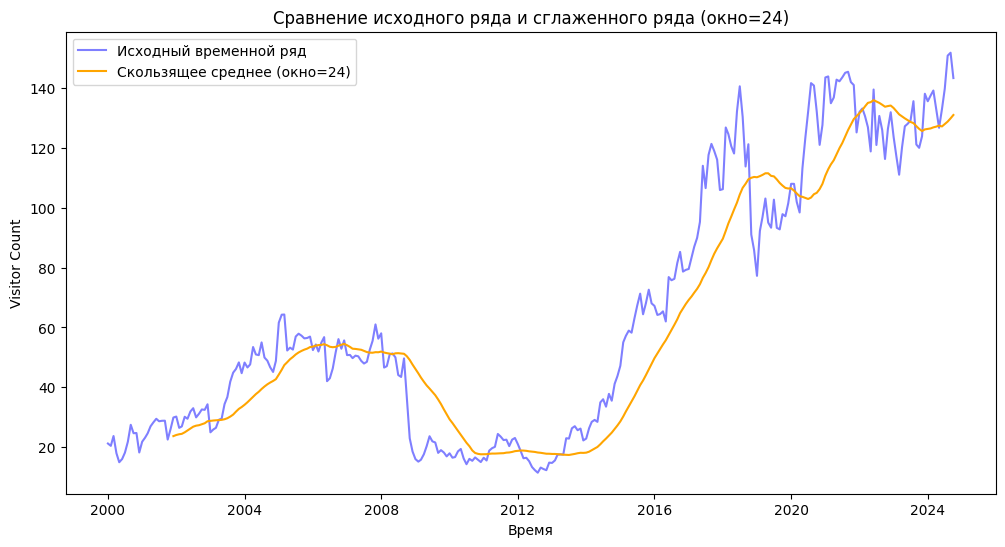

In [ ]:
window_sizes = [12, 24, 48]  # Размеры окна (например, 12, 24, 48 часов)

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Исходный временной ряд', color='blue')

for window_size in window_sizes:
    moving_avg = time_series.rolling(window=window_size).mean()
    plt.plot(moving_avg, label=f'Скользящее среднее (окно={window_size})')

plt.title('Скользящее среднее с разными размерами окна')
plt.xlabel('Время')
plt.ylabel('Visitor Count')
plt.legend()
plt.show()

# 3. Сравнение сглаженного ряда с исходным
window_size = 24  # Указываем одно окно для анализа
moving_avg = time_series.rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Исходный временной ряд', color='blue', alpha=0.5)
plt.plot(moving_avg, label=f'Скользящее среднее (окно={window_size})', color='orange')
plt.title(f'Сравнение исходного ряда и сглаженного ряда (окно={window_size})')
plt.xlabel('Время')
plt.ylabel('Visitor Count')
plt.legend()
plt.show()

In [ ]:
print(data)

           Date  Company  Ticker Symbol  Currency        Open        High  \
1430 2000-01-01        0              1         3   21.250000   28.765625   
1431 2000-02-01        0              1         3   20.468750   25.562500   
1432 2000-03-01        0              1         3   23.750000   26.125000   
1433 2000-04-01        0              1         3   18.000000   18.031250   
1434 2000-05-01        0              1         3   15.000000   16.968750   
...         ...      ...            ...       ...         ...         ...   
1723 2024-06-01        0              1         3  132.880005  141.820007   
1724 2024-07-01        0              1         3  139.710007  153.509995   
1725 2024-08-01        0              1         3  150.729996  152.070007   
1726 2024-09-01        0              1         3  151.699997  151.699997   
1727 2024-10-01        0              1         3  143.240005  151.589996   

             Low       Close   Adj Close     Volume  
1430   16.968750   20

In [ ]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
# 2. Лаговые переменные
lags = [6, 12, 24]  # Лаги на 1, 2 и 3 периода назад
for lag in lags:
    data[f'Close_Lag_{lag}'] = data['Close'].shift(lag)
    data[f'Volume_Lag_{lag}'] = data['Volume'].shift(lag)

# 3. Скользящие средние и волатильность
window_sizes = [7, 120, 180]  # Периоды окон
for window in window_sizes:
    data[f'Close_MA_{window}'] = data['Close'].rolling(window=window).mean()
    data[f'Close_STD_{window}'] = data['Close'].rolling(window=window).std()

# 4. Изменения (процентные)
data['Close_Change'] = data['Close'].pct_change()  # Изменение цены
data['Volume_Change'] = data['Volume'].pct_change()  # Изменение объема

# Удаление NaN (появляются из-за сдвигов и скользящих окон)
data = data.dropna()

print(data)

           Date  Company  Ticker Symbol  Currency        Open        High  \
1609 2014-12-01        0              1         3   43.759998   48.529999   
1610 2015-01-01        0              1         3   47.189999   55.799999   
1611 2015-02-01        0              1         3   55.029999   58.869999   
1612 2015-03-01        0              1         3   57.180000   60.209999   
1613 2015-04-01        0              1         3   58.939999   60.630001   
...         ...      ...            ...       ...         ...         ...   
1723 2024-06-01        0              1         3  132.880005  141.820007   
1724 2024-07-01        0              1         3  139.710007  153.509995   
1725 2024-08-01        0              1         3  150.729996  152.070007   
1726 2024-09-01        0              1         3  151.699997  151.699997   
1727 2024-10-01        0              1         3  143.240005  151.589996   

             Low       Close   Adj Close    Volume  ...  Close_Lag_24  \
16

<ipython-input-20-723a53010781>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].dt.year
<ipython-input-20-723a53010781>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Date'].dt.month
<ipython-input-20-723a53010781>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

Гипотеза 1: Сезонность цен акций видеоигр

Гипотеза: Цены на акции видеоигр имеют сезонные колебания, где в определенные месяцы года наблюдаются увеличения цен.

Метод: Проверка различий в ценах на акции между месяцами.
Тест: t-тест для различий цен акций в январе и декабре.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Группировка по месяцам (например, январь и декабрь)
january = data[data['Month'] == 1]['Close']
december = data[data['Month'] == 12]['Close']

# t-тест для проверки различий
stat, p = ttest_ind(january, december)
print(f"T-test: statistic={stat:.4f}, p-value={p:.4f}")

if p < 0.05:
    print("Гипотеза подтверждается: цены на акции имеют сезонные колебания.")
else:
    print("Гипотеза отвергается: нет сезонности в ценах.")


T-test: statistic=0.3595, p-value=0.7234
Гипотеза отвергается: нет сезонности в ценах.


Гипотеза 2: Влияние объемов торговли на цену акций

Гипотеза: Увеличение объема торгов связано с ростом цен на акции.

Метод: Проверка корреляции между объемом торговли и ценой акций.
Тест: Корреляционный анализ (Пирсона).

In [ ]:
from scipy.stats import pearsonr

# Проверка корреляции между объемом торговли и ценой акций
correlation, p_value = pearsonr(data['Volume'], data['Close'])
print(f"Корреляция: {correlation:.4f}, p-value={p_value:.4f}")

if p_value < 0.05:
    print("Гипотеза подтверждается: существует значимая корреляция между объемом торговли и ценой.")
else:
    print("Гипотеза отвергается: нет значимой корреляции.")


Корреляция: -0.4187, p-value=0.0000
Гипотеза подтверждается: существует значимая корреляция между объемом торговли и ценой.


Гипотеза 3: Лаговые переменные влияют на цену акций

Гипотеза: Лаговые значения цен на акции влияют на текущие цены.
Метод: Проверка влияния лаговых переменных на текущие цены.

Тест: t-тест для различий.

In [ ]:
from scipy.stats import ttest_ind

# Сравнение цен с лагами и без
close_lag_1 = data['Close_Lag_6']
close_lag_2 = data['Close_Lag_12']
close_lag_3 = data['Close_Lag_24']
current_close = data['Close']

# t-тест для сравнения
stat_1, p_1 = ttest_ind(close_lag_1.dropna(), current_close.dropna())
stat_2, p_2 = ttest_ind(close_lag_2.dropna(), current_close.dropna())
stat_3, p_3 = ttest_ind(close_lag_3.dropna(), current_close.dropna())

print(f"T-test для лагов 6: statistic={stat_1:.4f}, p-value={p_1:.4f}")
print(f"T-test для лагов 12: statistic={stat_2:.4f}, p-value={p_2:.4f}")
print(f"T-test для лагов 24: statistic={stat_3:.4f}, p-value={p_3:.4f}")

if p_1 < 0.05:
    print("Гипотеза подтверждается: лаг 6 влияет на цену акций.")
else:
    print("Гипотеза отвергается: лаг 6 не влияет на цену акций.")

if p_2 < 0.05:
    print("Гипотеза подтверждается: лаг 12 влияет на цену акций.")
else:
    print("Гипотеза отвергается: лаг 12 не влияет на цену акций.")

if p_3 < 0.05:
    print("Гипотеза подтверждается: лаг 24 влияет на цену акций.")
else:
    print("Гипотеза отвергается: лаг 24 не влияет на цену акций.")



T-test для лагов 6: statistic=-1.4435, p-value=0.1502
T-test для лагов 12: statistic=-2.7117, p-value=0.0072
T-test для лагов 24: statistic=-4.8044, p-value=0.0000
Гипотеза отвергается: лаг 6 не влияет на цену акций.
Гипотеза подтверждается: лаг 12 влияет на цену акций.
Гипотеза подтверждается: лаг 24 влияет на цену акций.


Гипотеза 4: Влияние скользящих средних на цену акций

Гипотеза: Скользящие средние (например, 3, 7, 14 дней) имеют корреляцию с текущими ценами на акции.

Метод: Проверка корреляции между скользящими средними и текущими ценами.

Тест: Корреляция Пирсона.


In [ ]:
corr_ma_7, p_ma_7 = pearsonr(data['Close_MA_7'], data['Close'])
corr_ma_120, p_ma_120 = pearsonr(data['Close_MA_120'], data['Close'])
corr_ma_180, p_ma_180 = pearsonr(data['Close_MA_180'], data['Close'])

print(f"Корреляция для MA 3: {corr_ma_7:.4f}, p-value={p_ma_7:.4f}")
print(f"Корреляция для MA 7: {corr_ma_120:.4f}, p-value={p_ma_120:.4f}")
print(f"Корреляция для MA 14: {corr_ma_180:.4f}, p-value={p_ma_180:.4f}")

if p_ma_7 < 0.05:
    print("Гипотеза подтверждается: MA 7 влияет на цену акций.")
else:
    print("Гипотеза отвергается: MA 7 не влияет на цену акций.")

if p_ma_120 < 0.05:
    print("Гипотеза подтверждается: MA 120 влияет на цену акций.")
else:
    print("Гипотеза отвергается: MA 120 не влияет на цену акций.")

if p_ma_180 < 0.05:
    print("Гипотеза подтверждается: MA 365 влияет на цену акций.")
else:
    print("Гипотеза отвергается: MA 365 не влияет на цену акций.")

Корреляция для MA 3: 0.9435, p-value=0.0000
Корреляция для MA 7: 0.7610, p-value=0.0000
Корреляция для MA 14: 0.8086, p-value=0.0000
Гипотеза подтверждается: MA 7 влияет на цену акций.
Гипотеза подтверждается: MA 120 влияет на цену акций.
Гипотеза подтверждается: MA 365 влияет на цену акций.


Гипотеза 5: Изменения объема торгов влияют на цену акций

Гипотеза: Изменения объема торгов на акциях видеоигр влияют на цену акций.

Метод: t-тест для изменения объема торговли и цен.

Тест: t-тест для различий.

In [ ]:
from scipy.stats import ttest_ind

print(data['Volume_Change'].isna().sum())  # Число пропущенных значений в объеме
print(data['Close_Change'].isna().sum())

# Сравнение изменения объема и изменения цен
volume_change = data['Volume_Change'].unique()
close_change = data['Close_Change'].unique()

# t-тест для проверки
stat, p = ttest_ind(volume_change, close_change)
print(f"T-test: statistic={stat:.4f}, p-value={p:.4f}")

if p < 0.05:
    print("Гипотеза подтверждается: изменения объема влияют на изменения цен.")
else:
    print("Гипотеза отвергается: нет значимого влияния изменений объема.")

0
0
T-test: statistic=1.0747, p-value=0.2836
Гипотеза отвергается: нет значимого влияния изменений объема.


Гипотеза 6: Цены на акции в определенные месяцы отличаются

Гипотеза: Цены на акции видеоигр отличаются в зависимости от месяца.

Метод: Сравнение цен на акции по месяцам.

Тест: ANOVA (анализ дисперсии).

In [ ]:
from scipy.stats import f_oneway

# Разделение данных по месяцам
months = data['Year'].unique()
monthly_prices = [data[data['Year'] == month]['Close'] for month in months]

# ANOVA для проверки различий
stat, p = f_oneway(*monthly_prices)
print(f"ANOVA: statistic={stat:.4f}, p-value={p:.4f}")

if p < 0.05:
    print("Гипотеза подтверждается: цены на акции различаются в разные месяцы.")
else:
    print("Гипотеза отвергается: нет значимых различий в ценах по месяцам.")


ANOVA: statistic=65.8370, p-value=0.0000
Гипотеза подтверждается: цены на акции различаются в разные месяцы.


Гипотеза 7: Объем торгов оказывает влияние на волатильность цен

Гипотеза: Больший объем торгов сопровождается большей волатильностью цен.

Метод: Проверка зависимости объема торгов и стандартного отклонения цен.

Тест: Корреляция Пирсона

In [ ]:
# Проверка корреляции между объемом торговли и волатильностью (стандартным отклонением цен)
correlation, p_value = pearsonr(data['Volume'], data['Close_STD_7'])  # Например, для стандартного отклонения за 3 дня
print(f"Корреляция: {correlation:.4f}, p-value={p_value:.4f}")

if p_value < 0.05:
    print("Гипотеза подтверждается: объем торговли влияет на волатильность цен.")
else:
    print("Гипотеза отвергается: нет значимого влияния объема на волатильность.")


Корреляция: 0.1959, p-value=0.0328
Гипотеза подтверждается: объем торговли влияет на волатильность цен.


Гипотеза 8: Цены на акции и объем торгов взаимосвязаны

Гипотеза: Объем торгов и цена акций взаимосвязаны.

Метод: Регрессионный анализ для предсказания цены на основе объема торговли.

Тест: Линейная регрессия.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Подготовка данных для линейной регрессии
X = data[['Volume']]  # Объем торговли
y = data['Close']  # Цена акции

# Моделирование линейной регрессии
model = LinearRegression()
model.fit(X, y)

print(f"Коэффициент регрессии: {model.coef_[0]:.4f}, Intercept: {model.intercept_:.4f}")

# Оценка модели
r_squared = model.score(X, y)
print(f"Коэффициент детерминации (R^2): {r_squared:.4f}")


Коэффициент регрессии: -0.0000, Intercept: 136.1203
Коэффициент детерминации (R^2): 0.1753


Гипотеза 9: Лаговые переменные объема торговли влияют на текущий объем торговли

Гипотеза: Лаговые значения объема торговли влияют на текущий объем торговли.

Метод: Проверка зависимости между текущим объемом торговли и лагами объема.

Тест: t-тест для лагов

In [ ]:
# Проверка влияния лаговых переменных объема на текущий объем торговли
volume_lag_1 = data['Volume_Lag_6']
volume_lag_2 = data['Volume_Lag_12']
volume_lag_3 = data['Volume_Lag_24']
current_volume = data['Volume']

# t-тесты для лаговых переменных
stat_1, p_1 = ttest_ind(volume_lag_1.dropna(), current_volume.dropna())
stat_2, p_2 = ttest_ind(volume_lag_2.dropna(), current_volume.dropna())
stat_3, p_3 = ttest_ind(volume_lag_3.dropna(), current_volume.dropna())

print(f"T-test для Volume Lag 1: statistic={stat_1:.4f}, p-value={p_1:.4f}")
print(f"T-test для Volume Lag 2: statistic={stat_2:.4f}, p-value={p_2:.4f}")
print(f"T-test для Volume Lag 3: statistic={stat_3:.4f}, p-value={p_3:.4f}")

if p_1 < 0.05:
    print("Гипотеза подтверждается: лаг 6 влияет на объем торговли.")
else:
    print("Гипотеза отвергается: лаг 6 не влияет на объем торговли.")

if p_2 < 0.05:
    print("Гипотеза подтверждается: лаг 12 влияет на объем торговли.")
else:
    print("Гипотеза отвергается: лаг 12 не влияет на объем торговли.")

if p_3 < 0.05:
    print("Гипотеза подтверждается: лаг 24 влияет на объем торговли.")
else:
    print("Гипотеза отвергается: лаг 24 не влияет на объем торговли.")

T-test для Volume Lag 1: statistic=0.4399, p-value=0.6604
T-test для Volume Lag 2: statistic=1.3198, p-value=0.1882
T-test для Volume Lag 3: statistic=2.7421, p-value=0.0066
Гипотеза отвергается: лаг 6 не влияет на объем торговли.
Гипотеза отвергается: лаг 12 не влияет на объем торговли.
Гипотеза подтверждается: лаг 24 влияет на объем торговли.


Гипотеза 11: Скользящие средние (7, 120, 365 дней) влияют на цену акций

Гипотеза: Скользящие средние с разными интервалами (7, 120, 365 дней) влияют на текущую цену акций.

Метод: Проверка зависимости между ценой и скользящими средними.

Тест: t-тест для средних значений.

In [ ]:
# Сравнение цены с различными скользящими средними
close_ma_3 = data['Close_MA_7']
close_ma_7 = data['Close_MA_120']
close_ma_14 = data['Close_MA_180']

# t-тест для каждой пары
stat_1, p_1 = ttest_ind(close_ma_3.dropna(), data['Close'].dropna())
stat_2, p_2 = ttest_ind(close_ma_7.dropna(), data['Close'].dropna())
stat_3, p_3 = ttest_ind(close_ma_14.dropna(), data['Close'].dropna())

print(f"T-test для MA 7: statistic={stat_1:.4f}, p-value={p_1:.4f}")
print(f"T-test для MA 120: statistic={stat_2:.4f}, p-value={p_2:.4f}")
print(f"T-test для MA 365: statistic={stat_3:.4f}, p-value={p_3:.4f}")

if p_1 < 0.05:
    print("Гипотеза подтверждается: MA 7 влияет на цену акций.")
else:
    print("Гипотеза отвергается: MA 7 не влияет на цену акций.")

if p_2 < 0.05:
    print("Гипотеза подтверждается: MA 120 влияет на цену акций.")
else:
    print("Гипотеза отвергается: MA 120 не влияет на цену акций.")

if p_3 < 0.056:
    print("Гипотеза подтверждается: MA 365 влияет на цену акций.")
else:
    print("Гипотеза отвергается: MA 365 не влияет на цену акций.")


T-test для MA 7: statistic=-0.7642, p-value=0.4455
T-test для MA 120: statistic=-14.3700, p-value=0.0000
T-test для MA 365: statistic=-20.4046, p-value=0.0000
Гипотеза отвергается: MA 7 не влияет на цену акций.
Гипотеза подтверждается: MA 120 влияет на цену акций.
Гипотеза подтверждается: MA 365 влияет на цену акций.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 1609 to 1727
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           119 non-null    datetime64[ns]
 1   Company        119 non-null    int64         
 2   Ticker Symbol  119 non-null    int64         
 3   Currency       119 non-null    int64         
 4   Open           119 non-null    float64       
 5   High           119 non-null    float64       
 6   Low            119 non-null    float64       
 7   Close          119 non-null    float64       
 8   Adj Close      119 non-null    float64       
 9   Volume         119 non-null    int64         
 10  Year           119 non-null    int32         
 11  Month          119 non-null    int32         
 12  Close_Lag_6    119 non-null    float64       
 13  Volume_Lag_6   119 non-null    float64       
 14  Close_Lag_12   119 non-null    float64       
 15  Volume_Lag_12  119 non-n

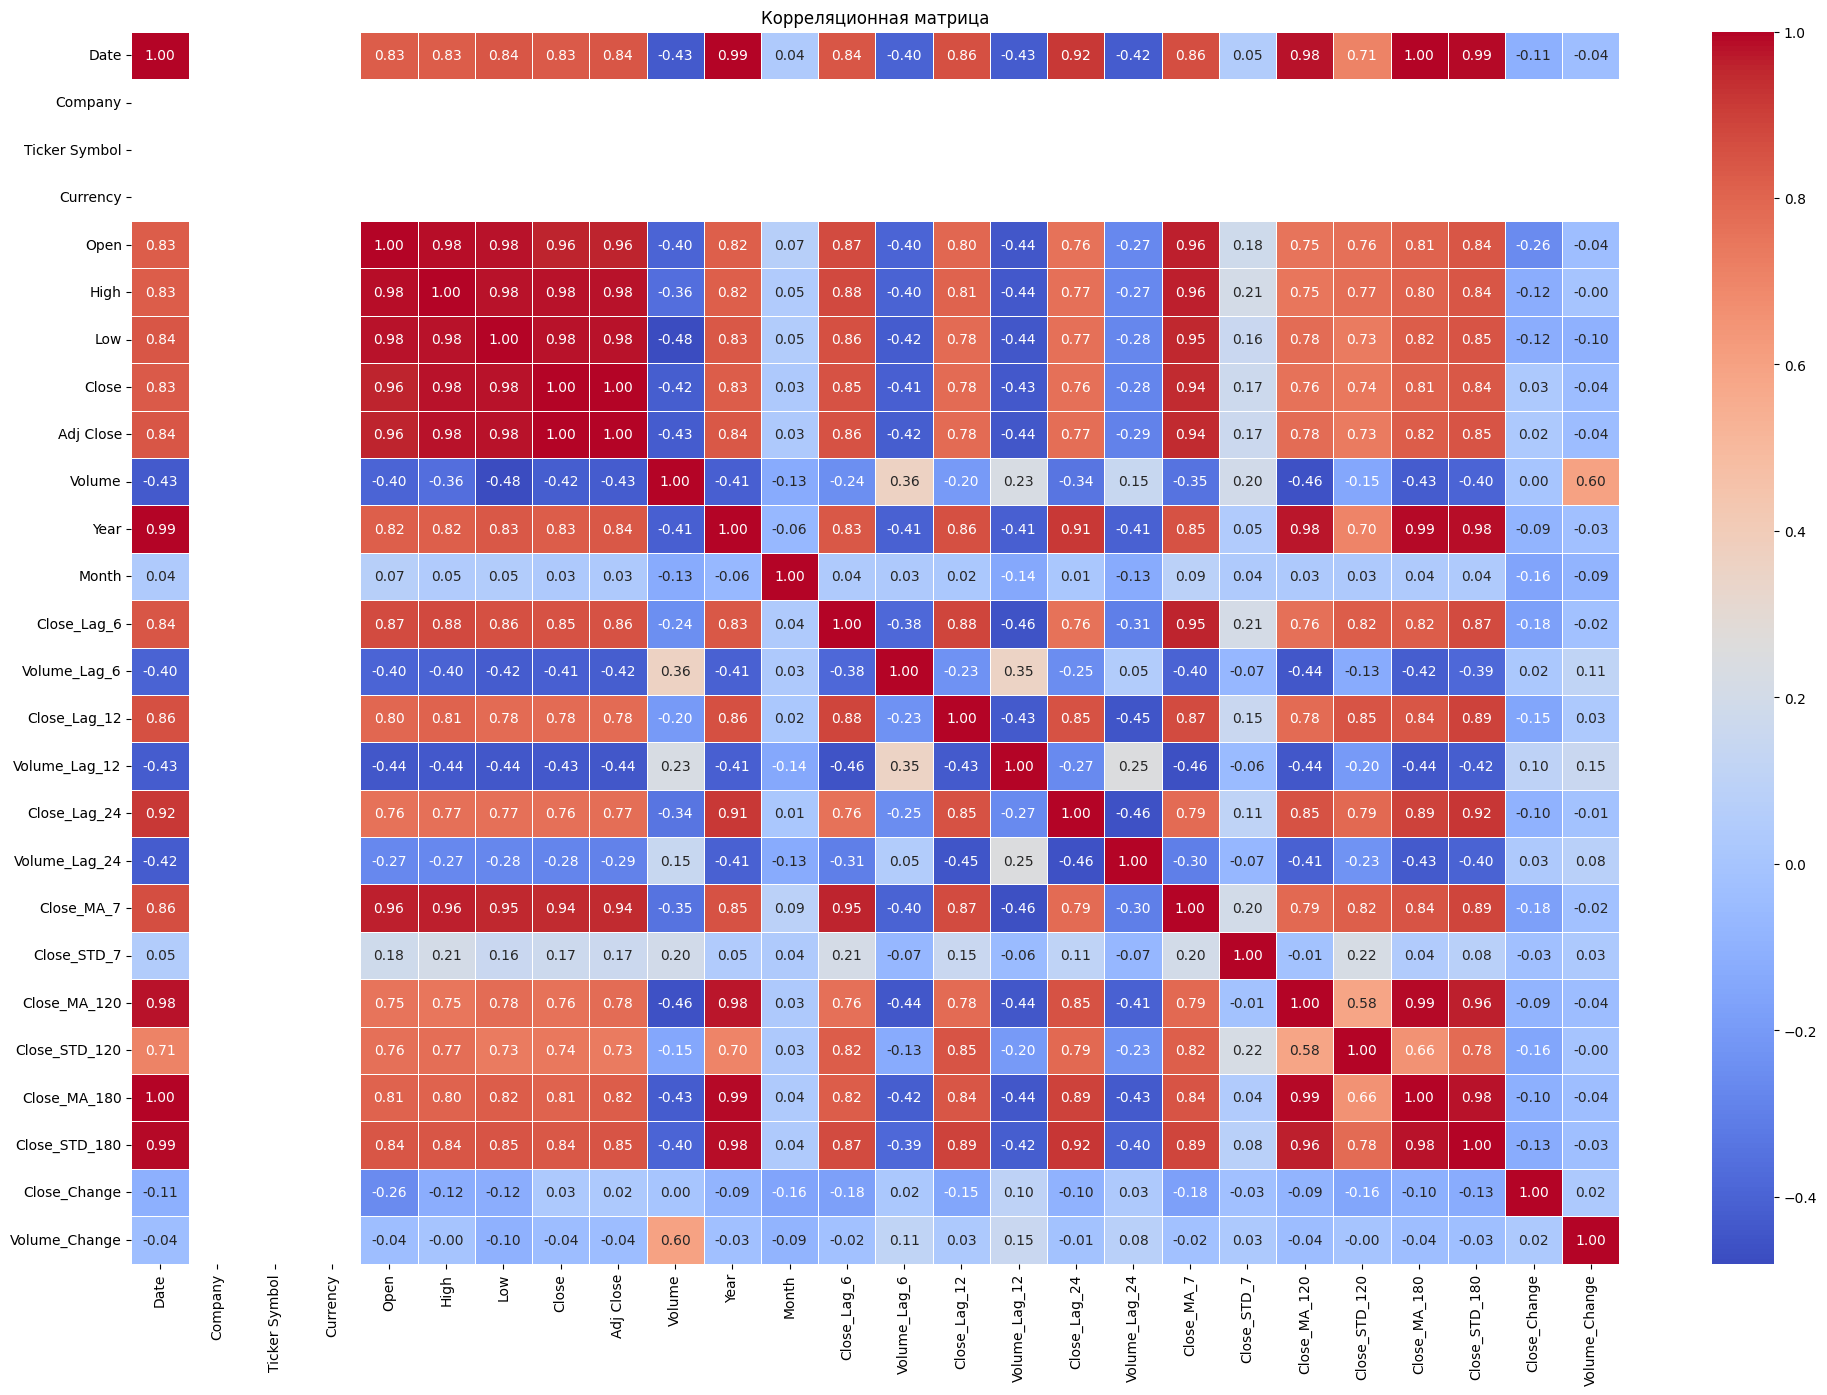

In [ ]:
# Корреляционный анализ
correlation_matrix = data.corr(method='pearson')

# Визуализируем корреляционную матрицу с помощью тепловой карты
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 1609 to 1727
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           119 non-null    datetime64[ns]
 1   Company        119 non-null    int64         
 2   Ticker Symbol  119 non-null    int64         
 3   Currency       119 non-null    int64         
 4   Open           119 non-null    float64       
 5   High           119 non-null    float64       
 6   Low            119 non-null    float64       
 7   Close          119 non-null    float64       
 8   Adj Close      119 non-null    float64       
 9   Volume         119 non-null    int64         
 10  Year           119 non-null    int32         
 11  Month          119 non-null    int32         
 12  Close_Lag_6    119 non-null    float64       
 13  Volume_Lag_6   119 non-null    float64       
 14  Close_Lag_12   119 non-null    float64       
 15  Volume_Lag_12  119 non-n

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Отбираем только числовые колонки
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Добавляем константу для вычисления VIF
X = add_constant(data_numeric)

# Вычисляем VIF для каждого признака
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Печатаем результат
print(vif_data)


          feature            VIF
0         Company            NaN
1   Ticker Symbol       0.000000
2        Currency       0.000000
3            Open     270.592766
4            High     119.312670
5             Low     127.259854
6           Close  123366.749124
7       Adj Close  127983.787412
8          Volume       4.830225
9     Close_Lag_6      22.256499
10   Volume_Lag_6       1.785383
11   Close_Lag_12      13.146904
12  Volume_Lag_12       2.080198
13   Close_Lag_24      22.049238
14  Volume_Lag_24       1.853115
15     Close_MA_7      91.638636
16    Close_STD_7       1.403627
17   Close_MA_120    1579.605747
18  Close_STD_120     475.603396
19   Close_MA_180     522.182569
20  Close_STD_180    3271.480512
21   Close_Change      16.567933
22  Volume_Change       2.466644


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
data = data.set_index('Date')

In [ ]:

# Разделим данные на обучающую и тестовую выборки
train_size = int(len(data['Close']) * 0.8)
train, test = data['Close'][:train_size], data['Close'][train_size:]

In [ ]:
test.index

DatetimeIndex(['2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01',
               '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01',
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
train.index

DatetimeIndex(['2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
               '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
      

In [ ]:
print(type(train))
print(train.head())  # Если train — это DataFrame или Series
print(train[:5])  #

<class 'pandas.core.series.Series'>
Date
2014-12-01    47.020000
2015-01-01    54.860001
2015-02-01    57.180000
2015-03-01    58.820000
2015-04-01    58.090000
Name: Close, dtype: float64
Date
2014-12-01    47.020000
2015-01-01    54.860001
2015-02-01    57.180000
2015-03-01    58.820000
2015-04-01    58.090000
Name: Close, dtype: float64


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(train, lags=6)
ar_model_fit = ar_model.fit()
ar_pred = ar_model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [ ]:
# MA (Moving Average) модель
from statsmodels.tsa.arima.model import ARIMA
ma_model = ARIMA(train, order=(0, 0, 6))  # MA(6)
ma_model_fit = ma_model.fit()
ma_pred = ma_model_fit.predict(start=len(train), end=len(train)+len(test)-1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# ARIMA (AutoRegressive Integrated Moving Average)

# Обучаем модель ARIMA
arima_model = ARIMA(train, order=(6, 1, 6))  # ARIMA(6,1,6)
arima_model_fit = arima_model.fit()
arima_pred = arima_model_fit.predict(start=len(train), end=len(train)+len(test)-1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# SARIMA (Seasonal ARIMA)

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Обучаем модель SARIMA (с учетом сезонности)
sarima_model = SARIMAX(train, order=(6, 1, 6), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_pred = sarima_model_fit.predict(start=len(train), end=len(train)+len(test)-1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(train.index)
print(data['Volume'][:train_size].index)


DatetimeIndex(['2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
               '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
      

In [ ]:
# SARIMAX (Seasonal ARIMA with exogenous variables) модель
# Предположим, что для SARIMAX мы будем использовать 'Volume' как экзогенную переменную
exog = data['Volume']
sarimax_model = SARIMAX(train, order=(6, 1, 6), seasonal_order=(1, 1, 1, 12), exog=exog[:train_size])
sarimax_model_fit = sarimax_model.fit()
sarimax_pred = sarimax_model_fit.predict(start=len(train), end=len(train)+len(test)-1, exog=exog[train_size:])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from statsmodels.tsa.api import VAR

# VAR (Vector Auto Regression) модель
# Для VAR нам нужно использовать несколько временных рядов, например, 'Close' и 'Volume'
# Добавим переменную 'Volume' для модели VAR
train_var = data[['Close', 'Volume']].iloc[:train_size]
test_var = data[['Close', 'Volume']].iloc[train_size:]

var_model = VAR(train_var)
var_model_fit = var_model.fit(maxlags=6, ic='aic')
var_pred = var_model_fit.forecast(train_var.values[-var_model_fit.k_ar:], steps=len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 16.0 MB/s eta 0:00:00


In [ ]:
# GARCH (Generalized Autoregressive Conditional Heteroskedasticity)
from arch import arch_model

garch_model = arch_model(train, vol='Garch', p=1, q=1)
garch_model_fit = garch_model.fit()
garch_pred = garch_model_fit.forecast(horizon=len(test))

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2595.4555178386076
Iteration:      2,   Func. Count:     13,   Neg. LLF: 447.58271207857683
Iteration:      3,   Func. Count:     19,   Neg. LLF: 431.6919112809149
Iteration:      4,   Func. Count:     24,   Neg. LLF: 431.6251533262042
Iteration:      5,   Func. Count:     29,   Neg. LLF: 431.60371632689476
Iteration:      6,   Func. Count:     34,   Neg. LLF: 431.58120555486045
Iteration:      7,   Func. Count:     39,   Neg. LLF: 431.5105108697685
Iteration:      8,   Func. Count:     44,   Neg. LLF: 431.4909451508496
Iteration:      9,   Func. Count:     49,   Neg. LLF: 431.4851795864583
Iteration:     10,   Func. Count:     54,   Neg. LLF: 431.4808865587613
Iteration:     11,   Func. Count:     59,   Neg. LLF: 431.4593112085009
Iteration:     12,   Func. Count:     64,   Neg. LLF: 431.4287986985001
Iteration:     13,   Func. Count:     69,   Neg. LLF: 431.35621289040506
Iteration:     14,   Func. Count:     74,   Neg. LLF: 431.2

In [ ]:
# Exponential Smoothing (Экспоненциальное сглаживание)
from statsmodels.tsa.holtwinters import ExponentialSmoothing

exp_smooth_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
exp_smooth_model_fit = exp_smooth_model.fit()
exp_smooth_pred = exp_smooth_model_fit.predict(start=len(train), end=len(train)+len(test)-1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


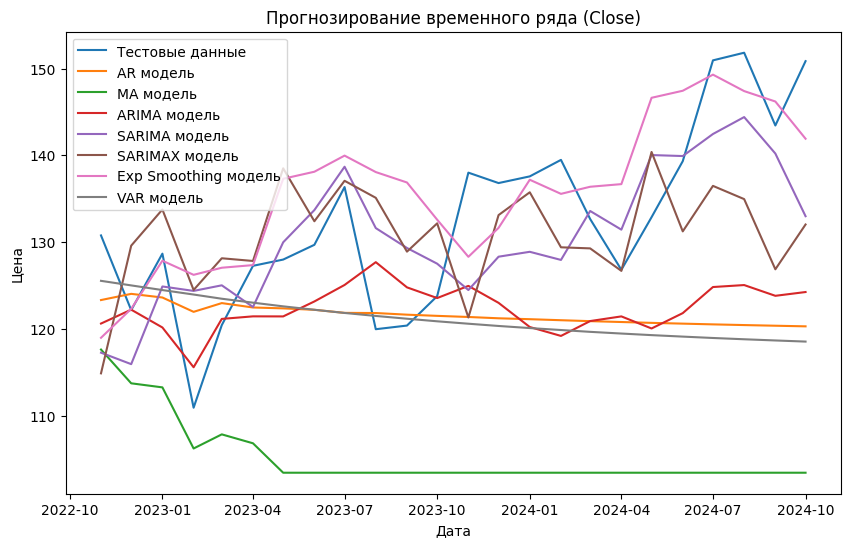

In [ ]:

# Визуализация предсказаний
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Тестовые данные')
plt.plot(test.index, ar_pred, label='AR модель')
plt.plot(test.index, ma_pred, label='MA модель')
plt.plot(test.index, arima_pred, label='ARIMA модель')
plt.plot(test.index, sarima_pred, label='SARIMA модель')
plt.plot(test.index, sarimax_pred, label='SARIMAX модель')
plt.plot(test.index, exp_smooth_pred, label='Exp Smoothing модель')
plt.plot(test.index, var_pred[:, 0], label='VAR модель')  # Предсказания для Close из VAR
plt.title('Прогнозирование временного ряда (Close)')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()


In [ ]:
import math
from sklearn.metrics import mean_squared_error

def rmse(true, pred):
    return math.sqrt(mean_squared_error(true, pred))

# Оценим все модели
print(f'AR RMSE: {rmse(test, ar_pred)}')
print(f'MA RMSE: {rmse(test, ma_pred)}')
print(f'ARIMA RMSE: {rmse(test, arima_pred)}')
print(f'SARIMA RMSE: {rmse(test, sarima_pred)}')
print(f'SARIMAX RMSE: {rmse(test, sarimax_pred)}')
print(f'Exponential Smoothing RMSE: {rmse(test, exp_smooth_pred)}')
print(f'VAR RMSE: {rmse(test, var_pred[:, 0])}')  # Используем только первый столбец (Close)

AR RMSE: 15.435980621419304
MA RMSE: 29.712231144505044
ARIMA RMSE: 14.025588122525352
SARIMA RMSE: 8.434184197518821
SARIMAX RMSE: 10.641012340419676
Exponential Smoothing RMSE: 8.841431166466469
VAR RMSE: 16.331323665284753


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2014-12-01 to 2024-10-01
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        119 non-null    int64  
 1   Ticker Symbol  119 non-null    int64  
 2   Currency       119 non-null    int64  
 3   Open           119 non-null    float64
 4   High           119 non-null    float64
 5   Low            119 non-null    float64
 6   Close          119 non-null    float64
 7   Adj Close      119 non-null    float64
 8   Volume         119 non-null    int64  
 9   Year           119 non-null    int32  
 10  Month          119 non-null    int32  
 11  Close_Lag_6    119 non-null    float64
 12  Volume_Lag_6   119 non-null    float64
 13  Close_Lag_12   119 non-null    float64
 14  Volume_Lag_12  119 non-null    float64
 15  Close_Lag_24   119 non-null    float64
 16  Volume_Lag_24  119 non-null    float64
 17  Close_MA_7     119 non-null    floa

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.73151e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.355e+02, tolerance: 7.023e+00
  model = cd_fast.enet_coordinate_descent(


Linear Regression RMSE: 2.3551
Ridge Regression RMSE: 5.5111
Lasso Regression RMSE: 2.9878
Polynomial Regression RMSE: 23.8243
Decision Tree Regressor RMSE: 7.2517


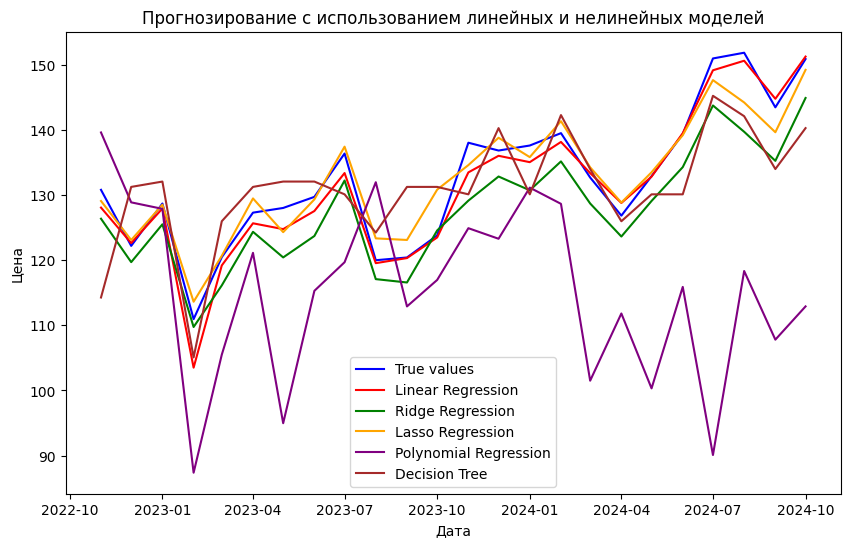

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Используем только 'Close' и дополнительные признаки для моделирования
X = data[['Open', 'High', 'Low', 'Volume', 'Close_Lag_6', 'Volume_Lag_6',
          'Close_Lag_12', 'Volume_Lag_12', 'Close_Lag_24', 'Volume_Lag_24', 'Close_MA_7',
          'Close_STD_7', 'Close_MA_120', 'Close_STD_120', 'Close_MA_180', 'Close_STD_180',
          'Close_Change', 'Volume_Change']]  # Признаки
y = data['Close']  # Целевая переменная

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 1. Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# 2. Ridge регрессия
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# 3. Lasso регрессия
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

# 4. Полиномиальная регрессия (нелинейная)
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

# 5. Решающее дерево (Decision Tree Regressor)
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

# Оценка моделей (RMSE)
def rmse(true, pred):
    return np.sqrt(mean_squared_error(true, pred))

# Результаты моделей
results = {
    'Linear Regression': rmse(y_test, y_pred_lin),
    'Ridge Regression': rmse(y_test, y_pred_ridge),
    'Lasso Regression': rmse(y_test, y_pred_lasso),
    'Polynomial Regression': rmse(y_test, y_pred_poly),
    'Decision Tree Regressor': rmse(y_test, y_pred_tree)
}

# Вывод результатов
for model, error in results.items():
    print(f'{model} RMSE: {error:.4f}')

# Визуализация предсказаний
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True values', color='blue')
plt.plot(y_test.index, y_pred_lin, label='Linear Regression', color='red')
plt.plot(y_test.index, y_pred_ridge, label='Ridge Regression', color='green')
plt.plot(y_test.index, y_pred_lasso, label='Lasso Regression', color='orange')
plt.plot(y_test.index, y_pred_poly, label='Polynomial Regression', color='purple')
plt.plot(y_test.index, y_pred_tree, label='Decision Tree', color='brown')
plt.title('Прогнозирование с использованием линейных и нелинейных моделей')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()


Gradient Boosting RMSE: 5.6242


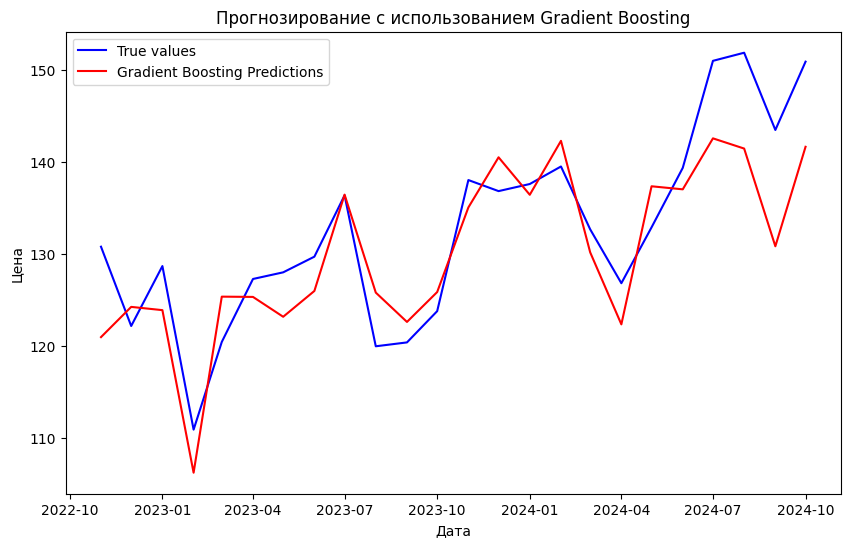

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Создание модели Gradient Boosting
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
gb_regressor.fit(X_train, y_train)

# Прогнозирование
y_pred_gb = gb_regressor.predict(X_test)

# Оценка модели
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f'Gradient Boosting RMSE: {rmse_gb:.4f}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True values', color='blue')
plt.plot(y_test.index, y_pred_gb, label='Gradient Boosting Predictions', color='red')
plt.title('Прогнозирование с использованием Gradient Boosting')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:24:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost RMSE: 4.4734


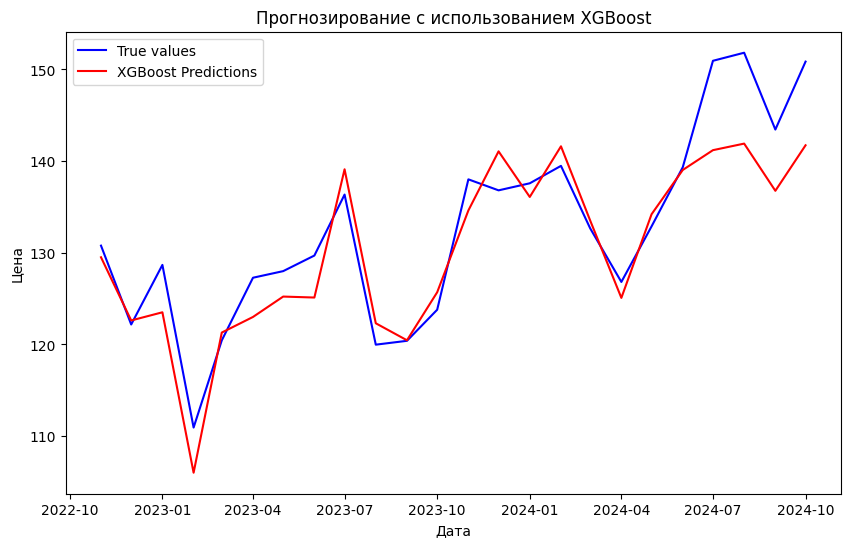

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Создание DMatrix (формат данных, используемый XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Настройка параметров для XGBoost
params = {
    'objective': 'reg:squarederror',  # Задача регрессии
    'max_depth': 6,  # Максимальная глубина дерева
    'learning_rate': 0.1,  # Темп обучения
    'n_estimators': 100,  # Количество деревьев
    'eval_metric': 'rmse',  # Оценка модели
}

# Обучение модели
model = xgb.train(params, dtrain, num_boost_round=100)

# Прогнозирование
y_pred_xgb = model.predict(dtest)

# Оценка модели
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'XGBoost RMSE: {rmse_xgb:.4f}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True values', color='blue')
plt.plot(y_test.index, y_pred_xgb, label='XGBoost Predictions', color='red')
plt.title('Прогнозирование с использованием XGBoost')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # Создаем объект
X_scaled = scaler.fit_transform(X)

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Создание модели CNN
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1))  # Для регрессии

# Компиляция модели
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Прогнозирование
y_pred_cnn = cnn_model.predict(X_test)

# Оценка модели
rmse_cnn = np.sqrt(mean_squared_error(y_test, y_pred_cnn))
print(f'CNN RMSE: {rmse_cnn:.4f}')


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 11610.1719
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11335.6641  
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11796.3838 
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11307.0898 
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11266.3789 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11161.8008 
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11335.0703 
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10607.3799
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11096.2090 
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10619.5020 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
CNN RMSE: 124.9759


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Создание модели RNN
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=64, activation='relu', input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dense(1))

# Компиляция модели
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Прогнозирование
y_pred_rnn = rnn_model.predict(X_test)

# Оценка модели
rmse_rnn = np.sqrt(mean_squared_error(y_test, y_pred_rnn))
print(f'RNN RMSE: {rmse_rnn:.4f}')


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 11810.5801
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11373.9160
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11619.6680 
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11342.4072 
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11116.4365 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11099.0723
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9765.0947
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6829.3677
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1389.3402
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2306.7119 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
RNN RMSE: 4.9507


In [ ]:
from keras.layers import LSTM

# Создание модели LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(1))

# Компиляция модели
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Прогнозирование
y_pred_lstm = lstm_model.predict(X_test)

# Оценка модели
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
print(f'LSTM RMSE: {rmse_lstm:.4f}')


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 11801.4492
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11582.8877
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11662.7441
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11878.2793
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12040.4717
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12000.8955
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11609.4453
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11855.8555 
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11648.5332 
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11088.1074
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
LSTM RMSE: 130.3679


In [ ]:
from keras.layers import GRU

# Создание модели GRU
gru_model = Sequential()
gru_model.add(GRU(units=64, activation='relu', input_shape=(X_train.shape[1], 1)))
gru_model.add(Dense(1))

# Компиляция модели
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
gru_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Прогнозирование
y_pred_gru = gru_model.predict(X_test)

# Оценка модели
rmse_gru = np.sqrt(mean_squared_error(y_test, y_pred_gru))
print(f'GRU RMSE: {rmse_gru:.4f}')


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 12531.3750
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11990.8066
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11607.2871 
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11493.9141
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11846.4951 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11538.1260
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11857.4775 
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11396.9180 
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11249.4209 
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11535.8086
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
GRU RMSE: 131.8378


In [ ]:
from keras.layers import Bidirectional

# Создание модели BiRNN
birnn_model = Sequential()
birnn_model.add(Bidirectional(SimpleRNN(units=64, activation='relu'), input_shape=(X_train.shape[1], 1)))
birnn_model.add(Dense(1))

# Компиляция модели
birnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
birnn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Прогнозирование
y_pred_birnn = birnn_model.predict(X_test)

# Оценка модели
rmse_birnn = np.sqrt(mean_squared_error(y_test, y_pred_birnn))
print(f'BiRNN RMSE: {rmse_birnn:.4f}')


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 11761.4561
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11935.6094
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11722.5527 
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11670.8896 
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11283.1973 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11530.3711
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10646.7656 
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9317.7832
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6596.1455 
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1351.1570


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
BiRNN RMSE: 67.5469


In [ ]:
# Создание комбинированной модели CNN + LSTM
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(LSTM(units=64, activation='relu'))
cnn_lstm_model.add(Dense(1))

# Компиляция модели
cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
cnn_lstm_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Прогнозирование
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test)

# Оценка модели
rmse_cnn_lstm = np.sqrt(mean_squared_error(y_test, y_pred_cnn_lstm))
print(f'CNN + LSTM RMSE: {rmse_cnn_lstm:.4f}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 11362.0508
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11174.5361
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11560.3848 
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11365.0508
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11499.4004
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11719.5293
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11116.4990 
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11335.9990 
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10979.1572
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10555.3340


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
CNN + LSTM RMSE: 113.6963


In [ ]:
results = {
    'CNN': rmse_cnn,
    'RNN': rmse_rnn,
    'LSTM': rmse_lstm,
    'GRU': rmse_gru,
    'BiRNN': rmse_birnn,
    'CNN + LSTM': rmse_cnn_lstm
}

# Вывод результатов
for model, error in results.items():
    print(f'{model} RMSE: {error:.4f}')


CNN RMSE: 124.9759
RNN RMSE: 4.9507
LSTM RMSE: 130.3679
GRU RMSE: 131.8378
BiRNN RMSE: 67.5469
CNN + LSTM RMSE: 113.6963


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Преобразование данных в последовательности
def create_sequences(X, y, seq_length=30):
    sequences_X = []
    sequences_y = []
    for i in range(len(X) - seq_length):
        sequences_X.append(X.iloc[i:i+seq_length].values)
        sequences_y.append(y.iloc[i+seq_length])
    return np.array(sequences_X), np.array(sequences_y)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Масштабирование данных
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

print(X_train_scaled.shape)
print(y_train_scaled.shape)

# Создание последовательностей для модели
X_train_seq, y_train_seq = create_sequences(pd.DataFrame(X_train_scaled), pd.Series(y_train_scaled), seq_length=30)
X_test_seq, y_test_seq = create_sequences(pd.DataFrame(X_test_scaled), pd.Series(y_test_scaled), seq_length=30)


(95, 18)
(95,)


In [ ]:
print("X_train_seq.shape:", X_train_seq.shape)  # Должно быть (кол-во образцов, 30, 18)
print("y_train_seq.shape:", y_train_seq.shape)  # Должно быть (кол-во образцов,) или (кол-во образцов, 1)

y_train_seq = np.array(y_train_seq).reshape(-1, 1)
y_test_seq = np.array(y_test_seq).reshape(-1, 1)

print("y_train_seq.shape:", y_train_seq.shape)  # Должно быть (кол-во образцов, 30, 18)
print("y_test_seq.shape:", y_test_seq.shape)

X_train_seq.shape: (65, 30, 18)
y_train_seq.shape: (65, 1)
y_train_seq.shape: (65, 1)
y_test_seq.shape: (0, 1)


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import MinMaxScaler
from transformers import TimeSeriesTransformerModel, TimeSeriesTransformerConfig
from datasets import Dataset

# Загрузка данных (замените на ваш источник данных)
time_series = data["Open"].values  # используем только числовые значения

# Нормализация данных
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(time_series.reshape(-1, 1)).flatten()

# Разделение на тренировочные и тестовые данные (80% / 20%)
train_size = int(len(time_series_scaled) * 0.8)
train_data = time_series_scaled[:train_size]
test_data = time_series_scaled[train_size:]

# Разбиение на последовательности (окна длиной 24 шага)
window_size = 6
num_samples = len(time_series) - window_size

# Функция для разбиения на окна
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Создаем последовательности для тренировочных и тестовых данных
X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

# Проверка размеров данных
print(f"Размер X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Размер X_test: {X_test.shape}, y_test: {y_test.shape}")


Размер X_train: (89, 6), y_train: (89,)
Размер X_test: (18, 6), y_test: (18,)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19            │ (None, 6, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_51 (Dense)          │ (None, 6, 64)          │            128 │ input_layer_19[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_13   │ (None, 6, 64)          │         66,368 │ dense_51[0][0],        │
│ (MultiHeadAttention)      │                        │                │ dense_51[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_15 (Add)              │ (None, 6, 64)          │              0 │ dense_51[0][0],        │
│                           │                        │                │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_18    │ (None, 6, 64)          │            128 │ add_15[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_52 (Dense)          │ (None, 6, 128)         │          8,320 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_53 (Dense)          │ (None, 6, 64)          │          8,256 │ dense_52[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_16 (Add)              │ (None, 6, 64)          │              0 │ layer_normalization_1… │
│                           │                        │                │ dense_53[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_19    │ (None, 6, 64)          │            128 │ add_16[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 64)             │              0 │ layer_normalization_1… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_54 (Dense)          │ (None, 1)              │             65 │ global_average_poolin… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 83,393 (325.75 KB)

 Trainable params: 83,393 (325.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - loss: 0.1939 - mae: 0.3729 - val_loss: 0.2360 - val_mae: 0.4795
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1892 - mae: 0.3280 - val_loss: 0.0215 - val_mae: 0.1242
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0656 - mae: 0.2012 - val_loss: 0.0068 - val_mae: 0.0668
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0427 - mae: 0.1642 - val_loss: 0.0674 - val_mae: 0.2476
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0564 - mae: 0.1718 - val_loss: 0.0495 - val_mae: 0.2082
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0430 - mae: 0.1587 - val_loss: 0.0157 - val_mae: 0.1029
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0338 - mae: 0.1533 - val_loss: 0.0338 - val_mae: 0.1664
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0339 - mae: 0.1487 - val_loss: 0.0390 - val_mae: 0.1816
Epoch 9/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0

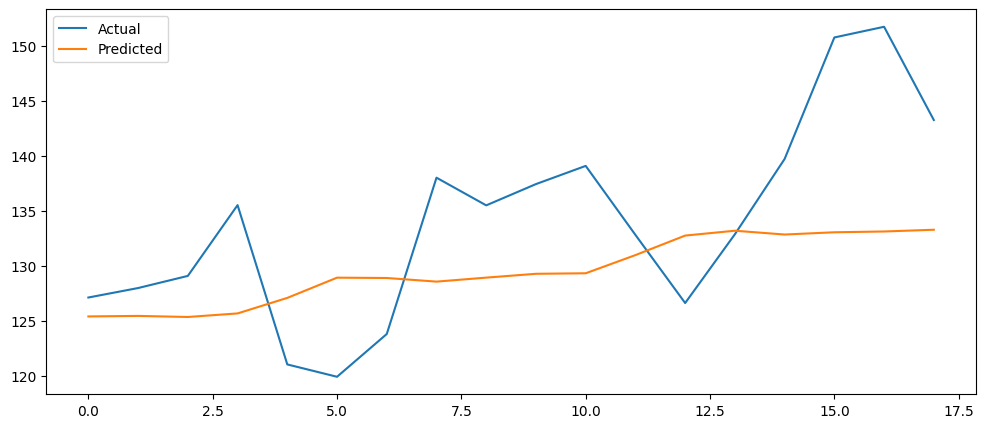

In [ ]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Построение модели Transformer
def transformer_model(window_size):
    inputs = layers.Input(shape=(window_size, 1))

    # 1. Embedding (временной ряд уже числовой, просто Dense)
    x = layers.Dense(64)(inputs)

    # 2. Multi-Head Attention
    attention_output = layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = layers.Add()([x, attention_output])  # Skip Connection
    x = layers.LayerNormalization()(x)

    # 3. Feed Forward
    x_ffn = layers.Dense(128, activation="relu")(x)
    x_ffn = layers.Dense(64)(x_ffn)
    x = layers.Add()([x, x_ffn])  # Skip Connection
    x = layers.LayerNormalization()(x)

    # 4. Global Average Pooling
    x = layers.GlobalAveragePooling1D()(x)

    # 5. Выходной слой
    outputs = layers.Dense(1)(x)

    model = keras.Model(inputs, outputs)
    return model

model = transformer_model(window_size)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss="mse", metrics=["mae"])
model.summary()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=16)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 5))
plt.plot(range(len(y_test_real)), y_test_real, label="Actual")
plt.plot(range(len(predictions)), predictions, label="Predicted")
plt.legend()
plt.show()
